In [1]:
%pylab inline
import ROOT
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyAmsUtils import tree_to_frame

In [3]:
#tfiles = [ROOT.TFile("/data/deuteronMC.ntuple{0}.root".format(i)) for i in range(1,4)]
filenames =glob.glob("/data/13*.root")[:1]

In [4]:
data = []
for filename in filenames:
    tfile = ROOT.TFile(filename)
    tree = tfile.Get("selections")
    tree.SetBranchStatus('*', ROOT.kFALSE)
    [tree.SetBranchStatus(b, ROOT.kTRUE) for b in ['PhysBPatt']]
    data.append(tree_to_frame(tree))
    print "File " + filename + " processed."
data = pd.concat(data)

File /data/1385813843.00000001.ntuple.root processed.


In [24]:
pattcounts = data['PhysBPatt'].map(lambda x:np.binary_repr(x,8)).value_counts()

# Counts (linear scale)

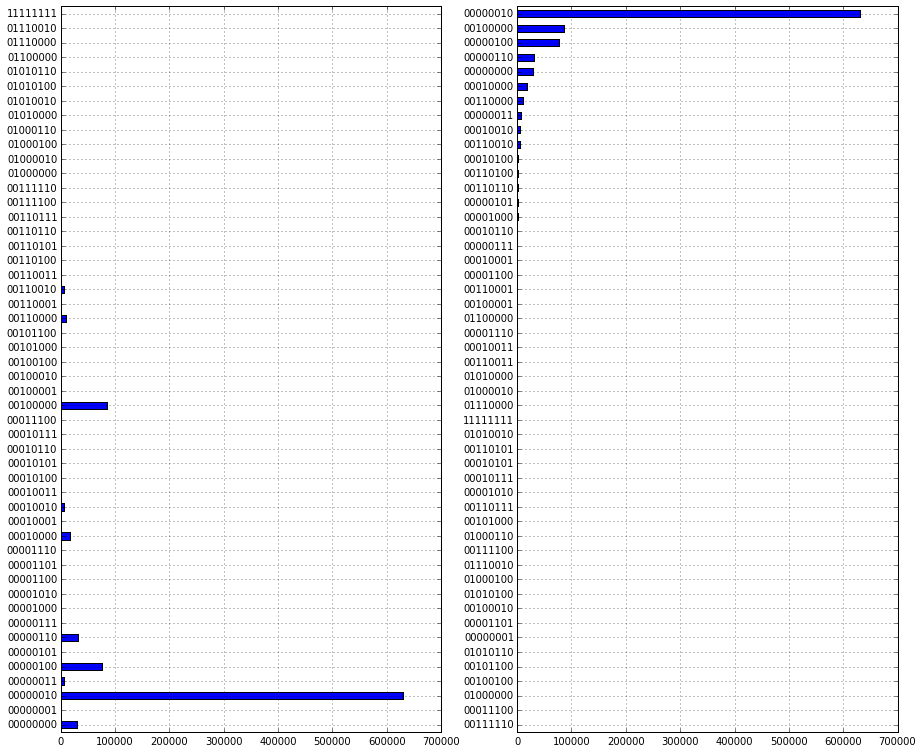

In [28]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh')
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh')

#Counts (Log scale)

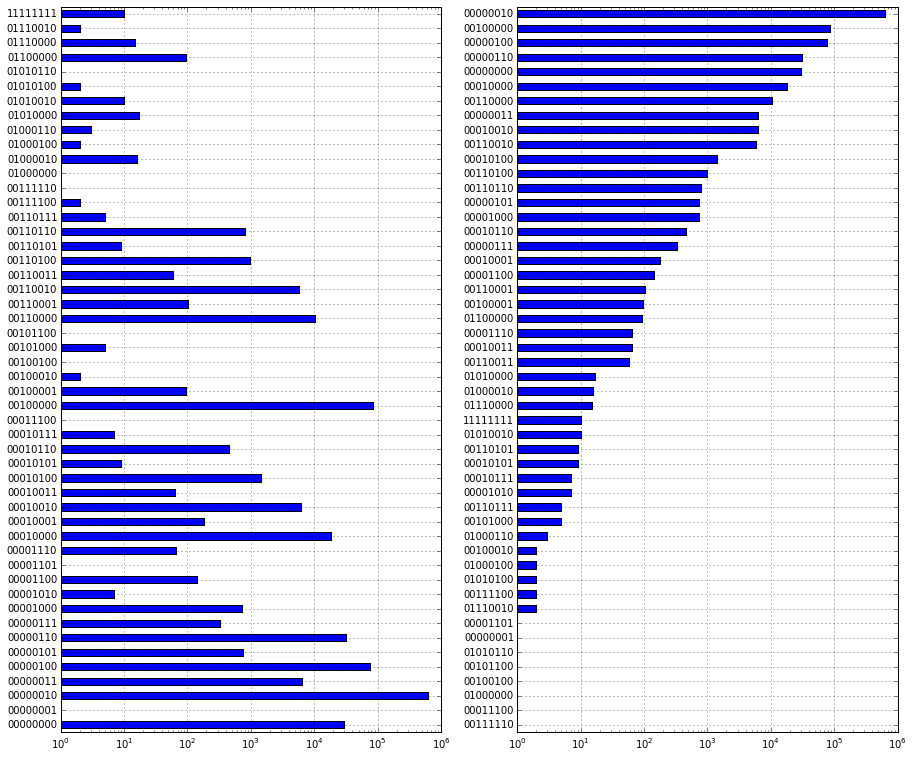

In [25]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh', logx=True)
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh', logx=True)